In [1]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_demographics = pd.read_excel('D:\Downloads 2\KPMG_VI_New_raw_data_update_final.xlsx', header=1, sheet_name='CustomerDemographic')

In [3]:
customer_demographics.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
customer_demographics.drop([ 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)

In [5]:
customer_demographics.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
customer_demographics = customer_demographics.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
customer_demographics['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
customer_demographics['gender'].replace('M', 'Male', inplace=True)
customer_demographics['gender'].replace('U', 'Unknown', inplace=True)
customer_demographics['deceased_indicator'].replace(['N'], 0, inplace=True)
customer_demographics['deceased_indicator'].replace(['Y'], 1, inplace=True)
customer_demographics['owns_car'].replace('Yes', 1, inplace=True)
customer_demographics['owns_car'].replace('No', 0, inplace=True)
customer_demographics = customer_demographics[customer_demographics['DOB'] != customer_demographics.DOB.min()]
customer_demographics[customer_demographics['deceased_indicator'] == 0]
customer_demographics = customer_demographics.drop(['deceased_indicator'], axis=1)
customer_demographics_clean = customer_demographics.dropna()
customer_demographics_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [7]:
customer_demographics_clean['age'] = (dt.datetime.now() - customer_demographics_clean['DOB']) / np.timedelta64(1, 'Y')
customer_demographics_clean['age_class'] = ((round(customer_demographics_clean['age'] / 10)) * 10).astype(int)
customer_demographics_clean.head()

<ipython-input-7-56c4bdda71ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demographics_clean['age'] = (dt.datetime.now() - customer_demographics_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-7-56c4bdda71ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demographics_clean['age_class'] = ((round(customer_demographics_clean['age'] / 10)) * 10).astype(int)


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.761756,70
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.582553,40
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,67.487965,70
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.786232,60
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,54.833359,50


# Exploring the Customer Address Dataset

In [8]:
customer_address = pd.read_excel('D:\Downloads 2\KPMG_VI_New_raw_data_update_final.xlsx', header=1, sheet_name='CustomerAddress')
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
customer_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [10]:
customer_address.drop([ 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'], axis=1, inplace=True)

In [11]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [12]:
customer_address['state'].replace('New South Wales', 'NSW', inplace=True)
customer_address['state'].replace('Victoria', 'VIC', inplace=True)
customer_address_clean = customer_address.dropna()
customer_address_clean.head(20)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,NSW,Australia,9
6,8,49 Londonderry Lane,2650,NSW,Australia,4
7,9,97736 7th Trail,2023,NSW,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [40]:
demo_customer_address = pd.merge(customer_demographics_clean, customer_address_clean, left_index=True, right_index=True)
demo_customer_address= demo_customer_address.dropna()
demo_customer_address.head()

,customer_id_x,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.761756,70,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.582553,40,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,67.487965,70,4,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.786232,60,5,17979 Del Mar Point,2448,NSW,Australia,4
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,54.833359,50,7,4 Delaware Trail,2210,NSW,Australia,9


In [14]:
txns_df = pd.read_excel('D:\Downloads 2\KPMG_VI_New_raw_data_update_final.xlsx', header=1, sheet_name='Transactions')
txns_df = txns_df.sort_values('customer_id')
txns_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
txns_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [17]:
txns_df.drop([ 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)

In [18]:
txns_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [19]:
txns_df.duplicated().sum()

0

In [20]:
txns_df.shape

(20000, 13)

In [21]:
txns_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [22]:
txns_df['product_first_sold_date'] = pd.TimedeltaIndex(txns_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
txns_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [23]:
txns_df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [25]:
txns_df_clean = txns_df.dropna()
txns_df_clean.shape

(19445, 13)

In [26]:
txns_df_clean['transaction_date'].describe()

<ipython-input-26-ef03bd492f04>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  txns_df_clean['transaction_date'].describe()


count                   19445
unique                    364
top       2017-08-18 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [27]:
most_recent_purchase = txns_df_clean['transaction_date'].max()
txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
txns_df_clean['profit'] = txns_df_clean['list_price'] - txns_df_clean['standard_cost']
txns_df_clean.head()

<ipython-input-27-2b7073f23eba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txns_df_clean['last_purchase_days_ago'] = most_recent_purchase - txns_df_clean['transaction_date']
<ipython-input-27-2b7073f23eba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txns_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
<ipython-input-27-2b7073f23eba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [28]:
txns_df_clean[txns_df_clean['last_purchase_days_ago'] > 365].shape

(0, 15)

In [29]:
rfmTable = txns_df_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [30]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [31]:
rfmTable.shape

(3492, 3)

In [32]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [33]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [34]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [35]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [36]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [37]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [41]:
addr_demo_txns = pd.merge(rfmSeg, demo_customer_address, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'age_class', 'customer_id_y', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [42]:
addr_demo_txns.shape

(2853, 25)

<AxesSubplot:xlabel='r_score'>

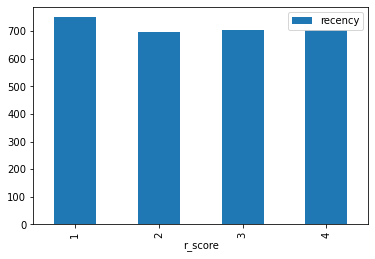

In [43]:
addr_demo_txns.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

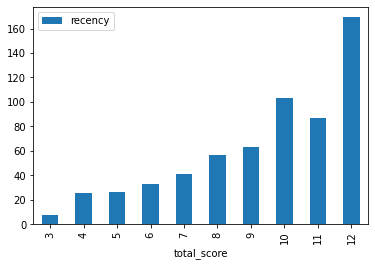

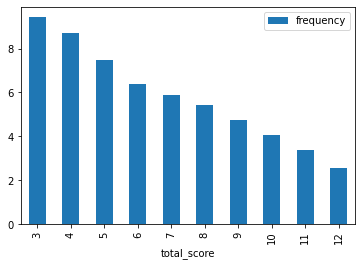

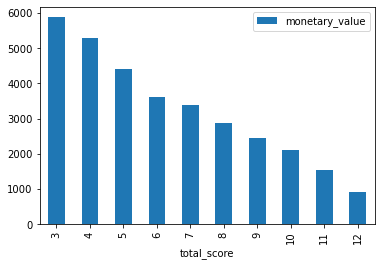

In [44]:
addr_demo_txns.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

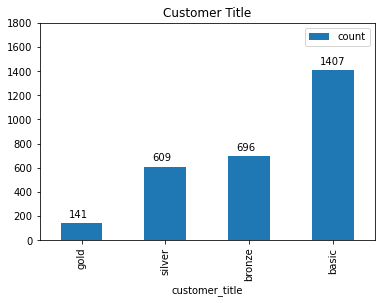

In [45]:
customer_titles_df = addr_demo_txns.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

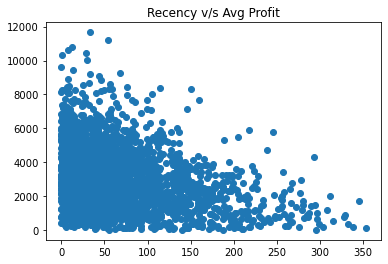

In [46]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

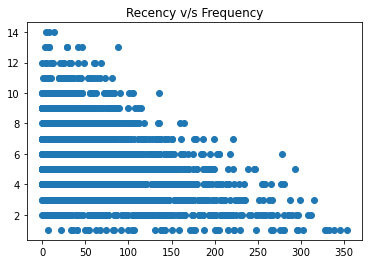

In [47]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

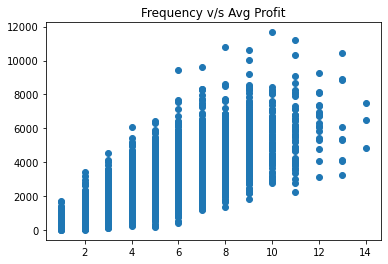

In [48]:
plt.scatter(addr_demo_txns['frequency'], addr_demo_txns['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

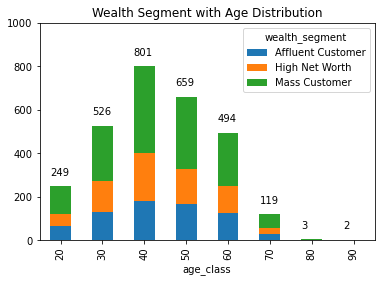

In [49]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

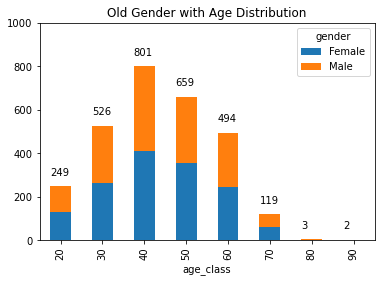

In [51]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

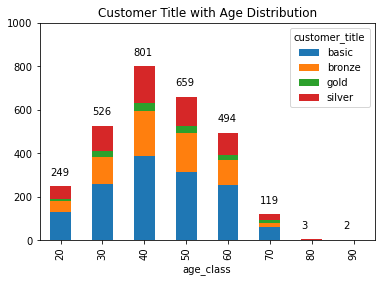

In [52]:
addr_demo_txns.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

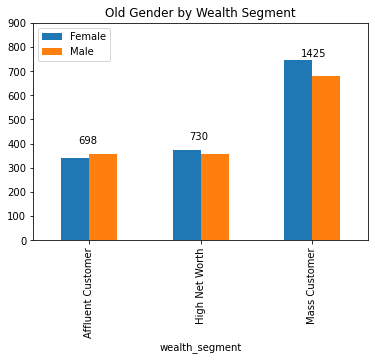

In [53]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

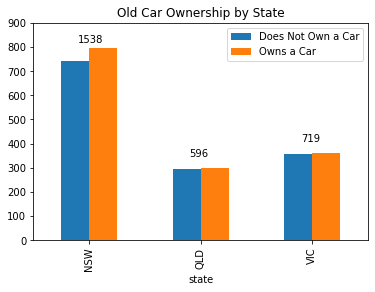

In [54]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

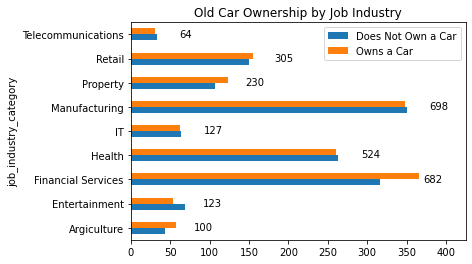

In [55]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

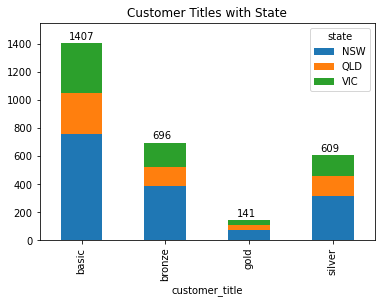

In [56]:
addr_demo_txns.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

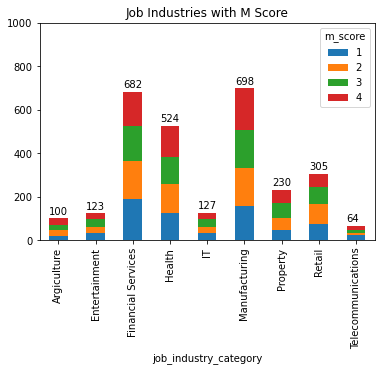

In [57]:
addr_demo_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

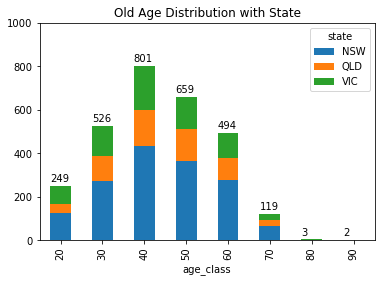

In [58]:
addr_demo_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [59]:
c = addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

,count
gender,
Female,69741
Male,69597


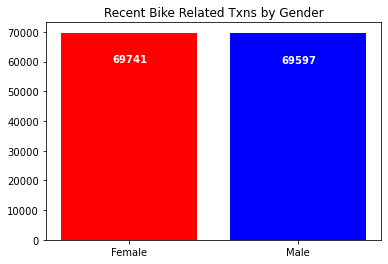

In [60]:
labels = ['Female', 'Male']
plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

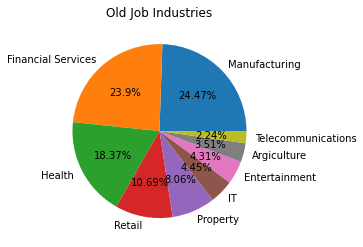

In [61]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [62]:
c = addr_demo_txns.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
customer_title,
basic,1407
bronze,696
gold,141
silver,609


In [63]:
c = addr_demo_txns.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             758
      bronze            387
      gold               75
      silver            318
QLD   basic             291
      bronze            133
      gold               32
      silver            140
VIC   basic             358
      bronze            176
      gold               34
      silver            151

In [64]:
c = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,141
4,308
5,576
6,887
7,1305
8,1724
9,2113
10,2408
11,2596


In [66]:
new_cust_list = pd.read_excel('D:\Downloads 2\KPMG_VI_New_raw_data_update_final.xlsx', header=1, sheet_name='NewCustomerList')
new_cust_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [67]:
new_cust_list.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [68]:
new_cust_list.duplicated().sum()

0

In [69]:
new_cust_list.shape

(1000, 23)

In [70]:
new_cust_list_clean = new_cust_list.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997,997,0.357000


In [71]:
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

<ipython-input-71-7e594cdcb531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-71-7e594cdcb531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,64.014893,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,51.321956,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,46.886547,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,42.467565,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,55.820337,60


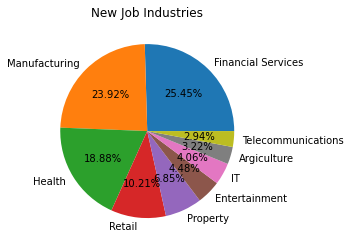

In [72]:
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

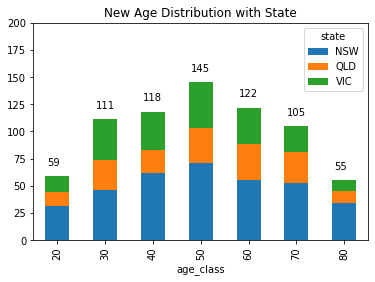

In [73]:
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

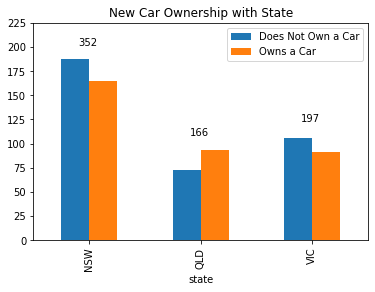

In [74]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

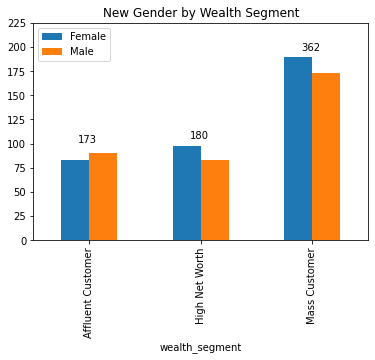

In [75]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

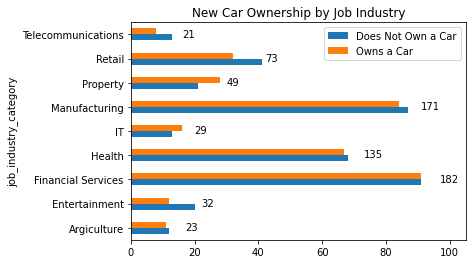

In [76]:
new_cust_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

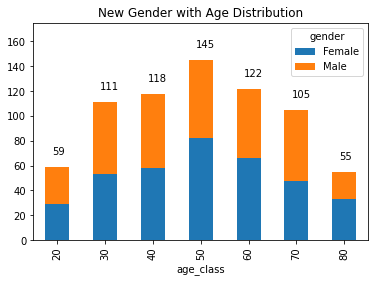

In [77]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [78]:
addr_demo_txns['customer_segment'] = addr_demo_txns['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_txns

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
1,7.0,11,3018.09,1,1,3,113,5,silver,2,...,16.0,40.582553,40,2,6 Meadow Vale Court,2153,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,3,...,15.0,67.487965,70,4,0 Holy Cross Court,4211,QLD,Australia,9,Losing
3,102.0,7,3290.21,4,3,3,433,10,basic,4,...,7.0,59.786232,60,5,17979 Del Mar Point,2448,NSW,Australia,4,Losing
5,16.0,6,2394.94,1,3,2,132,6,silver,6,...,13.0,54.833359,50,7,4 Delaware Trail,2210,NSW,Australia,9,Recent
6,64.0,5,3946.55,3,2,3,323,8,basic,7,...,11.0,45.395793,50,8,49 Londonderry Lane,2650,NSW,Australia,4,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,3497,...,18.0,35.205303,40,3501,16 Carberry Pass,2119,NSW,Australia,11,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,3498,...,5.0,25.704766,30,3502,12 Elgar Place,2155,NSW,Australia,10,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,basic,3499,...,7.0,42.082926,40,3503,8749 Menomonie Point,2122,NSW,Australia,11,Losing
3499,51.0,7,4955.25,3,3,1,331,7,basic,3500,...,17.0,53.990083,50,3504,18072 American Parkway,3195,VIC,Australia,10,Average


In [79]:
top_1000 = addr_demo_txns.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
719,11.0,8,4227.84,1,1,1,111,3,gold,720,...,6.0,89.733459,90,724,09 Bartelt Lane,2190,NSW,Australia,8,Platinum
768,5.0,9,5580.57,1,1,1,111,3,gold,769,...,12.0,59.550772,60,773,88 Bay Drive,4305,QLD,Australia,3,Platinum
2434,0.0,9,6874.53,1,1,1,111,3,gold,2435,...,14.0,59.928604,60,2439,75 Westerfield Park,4570,QLD,Australia,1,Platinum
3420,5.0,11,6808.18,1,1,1,111,3,gold,3421,...,18.0,58.581553,60,3425,5 Anhalt Court,3122,VIC,Australia,7,Platinum
144,6.0,8,4888.02,1,1,1,111,3,gold,145,...,4.0,23.988098,20,149,939 Coleman Pass,4509,QLD,Australia,7,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,31.0,5,3226.46,2,2,3,223,7,bronze,874,...,1.0,20.198835,20,878,1 Springview Place,4800,QLD,Australia,5,Average
3095,36.0,5,2799.49,2,2,3,223,7,bronze,3096,...,10.0,48.051563,50,3100,07 Loeprich Junction,2101,NSW,Australia,11,Average
3394,19.0,5,4073.20,2,2,3,223,7,bronze,3395,...,3.0,28.242806,30,3399,2 Monterey Terrace,2120,NSW,Australia,9,Average
1314,27.0,5,2894.17,2,2,3,223,7,bronze,1315,...,12.0,48.062515,50,1319,9 Dawn Court,4128,QLD,Australia,2,Average


In [80]:
writer = pd.ExcelWriter('D:\Downloads 2\KPMG_VI_New_raw_data_update_final.xlsx',
                        engine = 'xlsxwriter')
addr_demo_txns.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()

D:\Anaconda3\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
